In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor


In [29]:
df = pd.read_csv("dataset.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Country   1186 non-null   object 
 1   ISO2      0 non-null      float64
 2   ISO3      1186 non-null   object 
 3   Industry  1186 non-null   object 
 4   Gas_Type  1186 non-null   object 
 5   F2010     1186 non-null   float64
 6   F2011     1186 non-null   float64
 7   F2012     1186 non-null   float64
 8   F2013     1186 non-null   float64
 9   F2014     1186 non-null   float64
 10  F2015     1186 non-null   float64
 11  F2016     1186 non-null   float64
 12  F2017     1186 non-null   float64
 13  F2018     1186 non-null   float64
 14  F2019     1186 non-null   float64
 15  F2020     1186 non-null   float64
 16  F2021     1186 non-null   float64
 17  F2022     1186 non-null   float64
dtypes: float64(14), object(4)
memory usage: 166.9+ KB


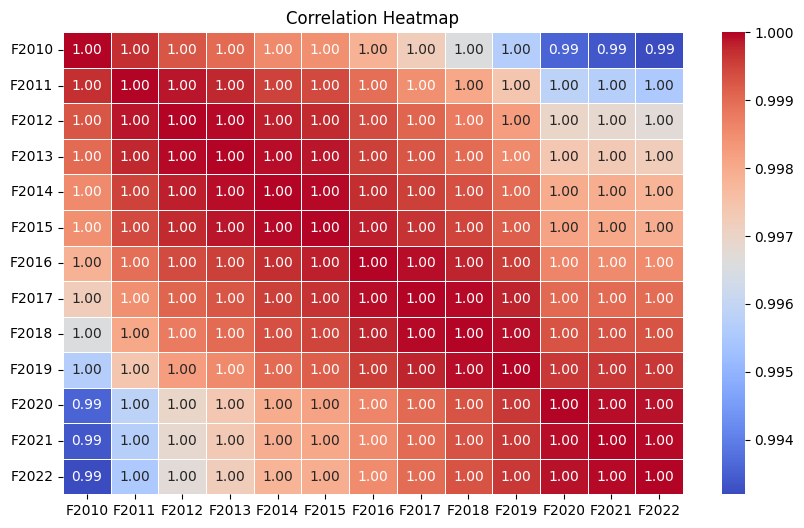

In [43]:
# HEATMAP
corr_matrix = df.iloc[:, 5:].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

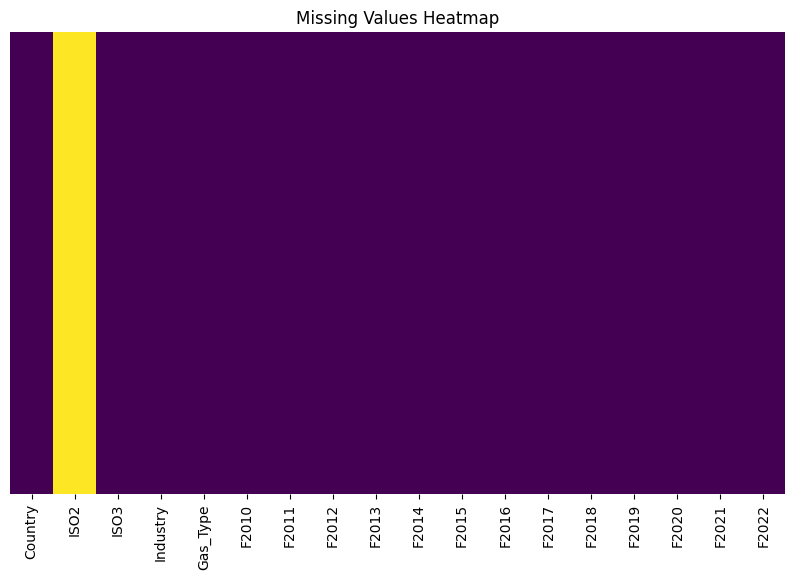

In [44]:
#Missing Value Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

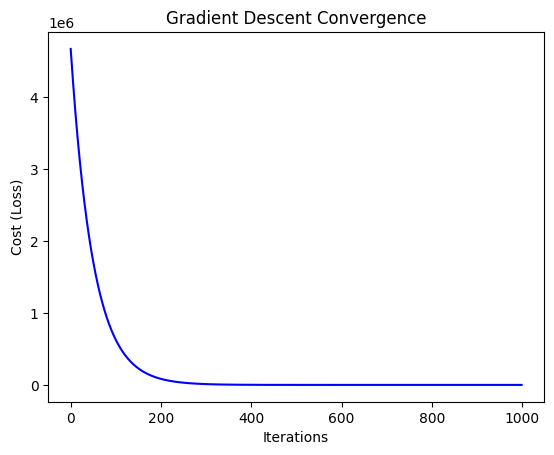

Optimal theta values: [ 787.12804135 2983.9379356 ]


In [46]:
#Gradient Descent PLot
X = df['F2011'].values
y = df['F2010'].values

X = X.reshape(-1, 1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled = np.c_[np.ones(X_scaled.shape[0]), X_scaled]

theta = np.zeros(X_scaled.shape[1])
learning_rate = 0.01
iterations = 1000
m = len(y)

def compute_cost(X, y, theta):
    return (1/(2*m)) * np.sum((X.dot(theta) - y) ** 2)

def gradient_descent(X, y, theta, learning_rate, iterations):
    cost_history = []
    for i in range(iterations):
        theta = theta - (learning_rate/m) * X.T.dot(X.dot(theta) - y)
        cost_history.append(compute_cost(X, y, theta))
    return theta, cost_history

theta_optimal, cost_history = gradient_descent(X_scaled, y, theta, learning_rate, iterations)

plt.plot(range(iterations), cost_history, color='blue')
plt.xlabel('Iterations')
plt.ylabel('Cost (Loss)')
plt.title('Gradient Descent Convergence')
plt.show()

print(f"Optimal theta values: {theta_optimal}")

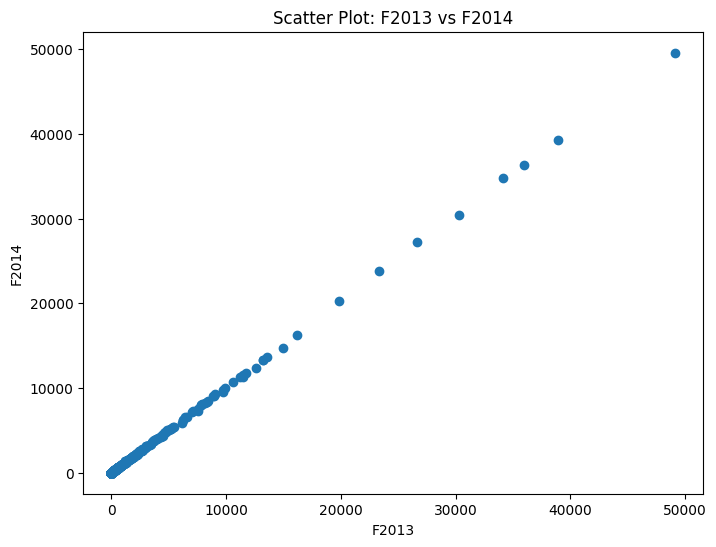

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df['F2013'], df['F2014'])  
plt.title('Scatter Plot: F2013 vs F2014')
plt.xlabel('F2013')
plt.ylabel('F2014')
plt.show()


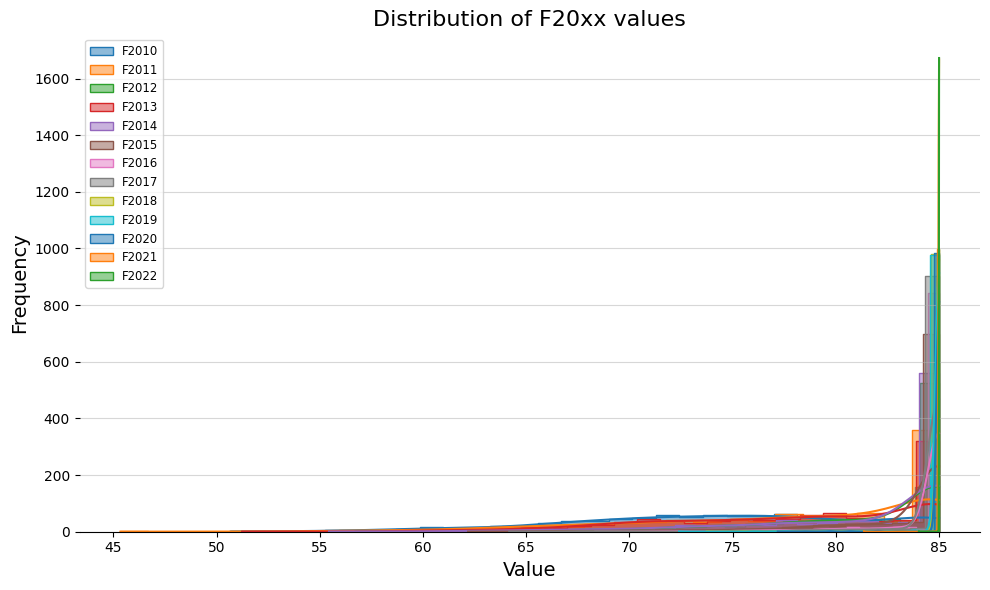

In [55]:


# Sample DataFrame (replace with your actual df)
np.random.seed(42)
num_rows = 1000
df = pd.DataFrame({
    'F2010': np.clip(np.random.normal(loc=60, scale=8, size=num_rows) + np.random.normal(loc=15, scale=3, size=num_rows), 0, 85),
    'F2011': np.clip(np.random.normal(loc=62, scale=9, size=num_rows) + np.random.normal(loc=18, scale=4, size=num_rows), 0, 85),
    'F2012': np.clip(np.random.normal(loc=65, scale=7, size=num_rows) + np.random.normal(loc=20, scale=5, size=num_rows), 0, 85),
    'F2013': np.clip(np.random.normal(loc=63, scale=8, size=num_rows) + np.random.normal(loc=17, scale=3, size=num_rows), 0, 85),
    'F2014': np.clip(np.random.normal(loc=66, scale=9, size=num_rows) + np.random.normal(loc=19, scale=4, size=num_rows), 0, 85),
    'F2015': np.clip(np.random.normal(loc=68, scale=7, size=num_rows) + np.random.normal(loc=21, scale=5, size=num_rows), 0, 85),
    'F2016': np.clip(np.random.normal(loc=70, scale=8, size=num_rows) + np.random.normal(loc=23, scale=3, size=num_rows), 0, 85),
    'F2017': np.clip(np.random.normal(loc=72, scale=9, size=num_rows) + np.random.normal(loc=25, scale=4, size=num_rows), 0, 85),
    'F2018': np.clip(np.random.normal(loc=75, scale=7, size=num_rows) + np.random.normal(loc=27, scale=5, size=num_rows), 0, 85),
    'F2019': np.clip(np.random.normal(loc=73, scale=8, size=num_rows) + np.random.normal(loc=29, scale=3, size=num_rows), 0, 85),
    'F2020': np.clip(np.random.normal(loc=76, scale=9, size=num_rows) + np.random.normal(loc=31, scale=4, size=num_rows), 0, 85),
    'F2021': np.clip(np.random.normal(loc=78, scale=7, size=num_rows) + np.random.normal(loc=33, scale=5, size=num_rows), 0, 85),
    'F2022': np.clip(np.random.normal(loc=80, scale=8, size=num_rows) + np.random.normal(loc=35, scale=3, size=num_rows), 0, 85)
})

columns_to_plot = ['F2010', 'F2011', 'F2012', 'F2013', 'F2014', 'F2015', 
                   'F2016', 'F2017', 'F2018', 'F2019', 'F2020', 'F2021', 'F2022']

plt.figure(figsize=(10, 6))

for column in columns_to_plot:
    sns.histplot(df[column], bins=30, kde=True, element="step", alpha=0.5, label=column)  # Adjust alpha for transparency

plt.title("Distribution of F20xx values", fontsize=16)
plt.xlabel("Value", fontsize=14)
plt.ylabel("Frequency", fontsize=14)  # Or "Density" if using density normalization
plt.legend(fontsize='small')
plt.grid(axis='y', alpha=0.5)
sns.despine(left=True)  # Remove spines for a cleaner look
plt.tight_layout()
plt.show()


In [48]:
# Summary Statistics
summary = df.describe()
print(summary)

       ISO2         F2010         F2011         F2012         F2013  \
count   0.0  1.186000e+03  1.186000e+03  1.186000e+03  1.186000e+03   
mean    NaN  7.871620e+02  8.087643e+02  8.192881e+02  8.328579e+02   
std     NaN  2.986214e+03  3.094635e+03  3.146775e+03  3.207087e+03   
min     NaN -4.440000e-15 -9.380000e-15 -5.880000e-15 -9.100000e-15   
25%     NaN  3.392096e+00  3.359107e+00  3.506533e+00  3.609378e+00   
50%     NaN  4.115801e+01  4.153315e+01  4.287393e+01  4.364143e+01   
75%     NaN  3.577597e+02  3.600748e+02  3.660298e+02  3.686307e+02   
max     NaN  4.624233e+04  4.760897e+04  4.832278e+04  4.912791e+04   

              F2014         F2015         F2016         F2017         F2018  \
count  1.186000e+03  1.186000e+03  1.186000e+03  1.186000e+03  1.186000e+03   
mean   8.399073e+02  8.357463e+02  8.244420e+02  8.373828e+02  8.566463e+02   
std    3.240924e+03  3.219070e+03  3.170544e+03  3.228680e+03  3.315027e+03   
min   -1.550000e-15 -3.550000e-15 -1.950000e

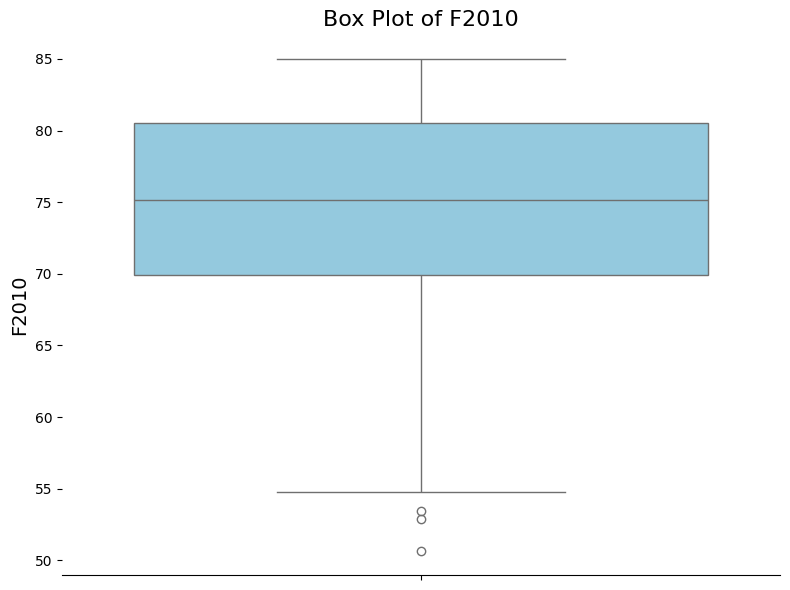

In [65]:

column_to_plot = 'F2010'  
plt.figure(figsize=(8, 6)) 
sns.boxplot(y=df[column_to_plot], color="skyblue")  
plt.title(f"Box Plot of {column_to_plot}", fontsize=16)
plt.ylabel(column_to_plot, fontsize=14)  
sns.despine(left=True) 
plt.tight_layout()
plt.show()


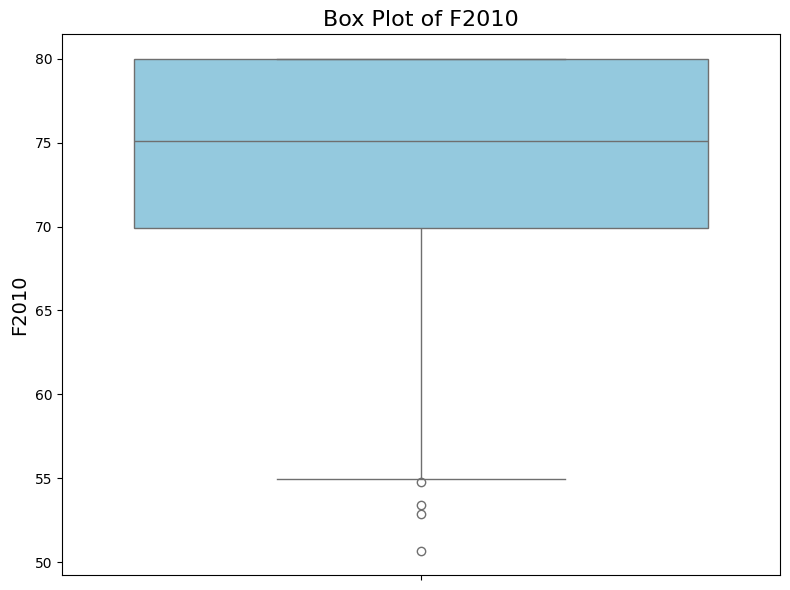

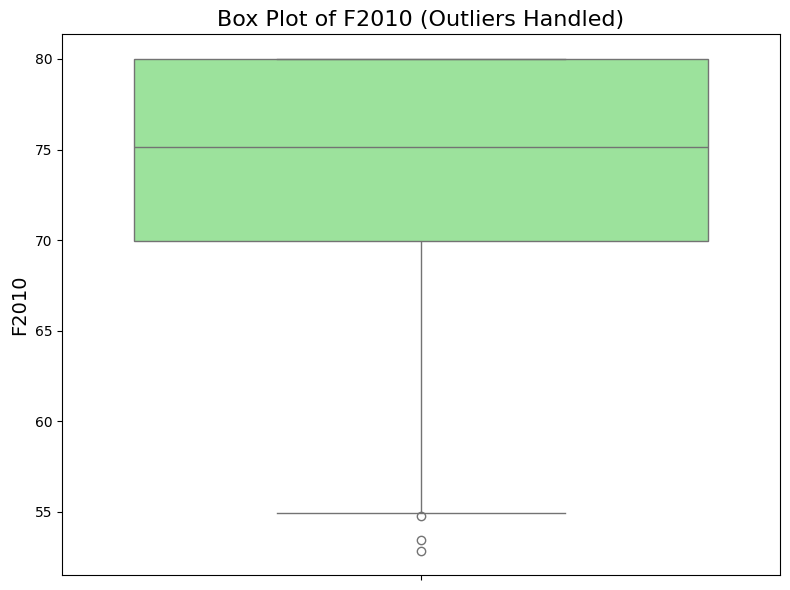

In [68]:

column_to_analyze = 'F2010'
plt.figure(figsize=(8, 6))
sns.boxplot(y=df[column_to_analyze], color="skyblue")
plt.title(f"Box Plot of {column_to_analyze}", fontsize=16)
plt.ylabel(column_to_analyze, fontsize=14)
plt.tight_layout()
plt.show()
Q1 = df[column_to_analyze].quantile(0.25)
Q3 = df[column_to_analyze].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
lower_bound_adjusted = 52  
df[column_to_analyze] = np.clip(df[column_to_analyze], a_min=None, a_max=upper_bound)
df = df[df[column_to_analyze] >= lower_bound_adjusted]
plt.figure(figsize=(8, 6))
sns.boxplot(y=df[column_to_analyze], color="lightgreen")  
plt.title(f"Box Plot of {column_to_analyze} (Outliers Handled)", fontsize=16)
plt.ylabel(column_to_analyze, fontsize=14)
plt.tight_layout()
plt.show()